## Exercise 2

### 2.1: Make an algorithm to generate [random walks](https://en.wikipedia.org/wiki/Random_walk) on a NetworkX graphs.

The form is `random_walk(G, nodeid, length)` so the input should be a graph, node ID and the number of steps to take in the random walk. The output is a list of node IDs in the walks

```
G = nx.binomial_graph(25, 0.3, directed=True)

# this output is random
# don't try to reproduce it exactly
random_walk(G, 3, 5) -> [3, 1, 4, 2, 3]
```

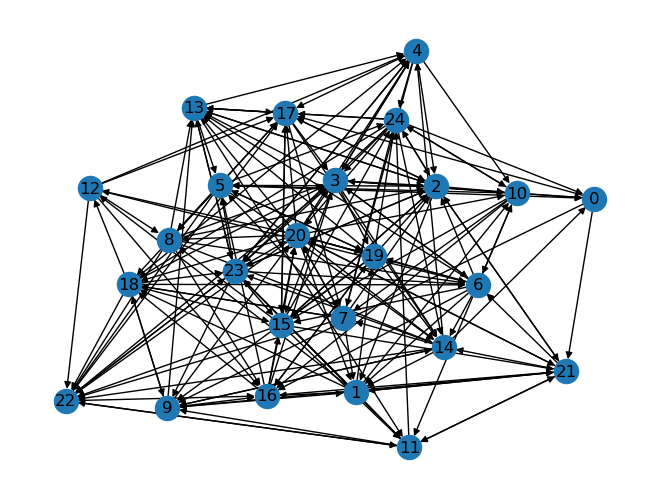

In [61]:
# exercise 2.1
# Let's 1st visualize out Graph
import networkx as nx
G = nx.binomial_graph(25, 0.3, directed=True)
nx.draw(G, with_labels=True)

In [63]:
#Pick the Next vertice at Random
#Algorithm:
#1- get the list with the next possible vertices. Then shuffle this list
#2- among the shuffled vertices list, we pick the 1st one in the list
#3- the list of possible vertices to pick from, is reset before looping again 

import random

def random_walk(G, nodeid, length):
    
    listnextnodes = []
    nextlocalnode = []
    currentNode = nodeid
    loop = 0

    while loop<length:
        
        #1
        for node in G[currentNode]:
            nextlocalnode.append(node)
        random.shuffle(nextlocalnode)
        #2
        nextNode = nextlocalnode[0]
        listnextnodes.append(nextNode)
        #3
        nextlocalnode = []
        currentNode = nextNode
        #
        loop+=1
    return listnextnodes
    
    
        
    
    
G = nx.binomial_graph(24, 0.3, directed=True)
random_walk(G, 5, 5)

[8, 0, 1, 21, 6]

In [20]:
#VERIFICATION: Let's check the picked vertices at each step, was actually accessible
# from Node 5, we got : [19, 9, 19, 7, 10]
print(G[5]) #=> 19 is accessible
print(G[19]) #=> 9 is accessible
print(G[9]) #=>19 is accessible
print(G[19]) #=> 7 is accessible
print(G[7]) #=> 10 is accessible

{3: {}, 11: {}, 13: {}, 14: {}, 15: {}, 19: {}}
{0: {}, 7: {}, 9: {}, 12: {}, 14: {}, 17: {}, 20: {}}
{2: {}, 3: {}, 6: {}, 7: {}, 13: {}, 15: {}, 19: {}, 21: {}}
{0: {}, 7: {}, 9: {}, 12: {}, 14: {}, 17: {}, 20: {}}
{0: {}, 1: {}, 2: {}, 3: {}, 10: {}, 12: {}, 16: {}, 17: {}, 18: {}, 23: {}}


### 2.2: Modify your random walk algorithm so that:

- It takes in on a weighed graph's adjacency matrix (a numpy matrix). 
- The probability to go from node A to node B should be proportional to the weight on their edge (relative to the other edges starting at node A).

Example:
```
G = np.array([
    [0, 0.5, 0, 0.5],
    [0.5, 0, 0, 0.5],
    [0.25, 0.25, 0.25, 0.25],
    [0.5, 0.5, 0, 0],
])

random_walk(G, 0, 4) -> [0, 1, 0, 3]
```

Here, `node 0` would give us 50% chance to transition to `node 1` and 50% chance to transition to `node 3`. Then `node 1` would give us 50% chance to transition to `node 0` and 50% to `node 3`, etc.

In [64]:
# exercise 2.2
#The goal is to add a weight to every edge of our graph. To do this:

#Algorithm:
#1- We need a adjency matrix of 25 by 25 inputs, representing the Nodes connections
#2- We need to put a weight on each connection
import numpy as np

#1
nx.adjacency_matrix(G) 
adjMat = nx.adjacency_matrix(G).todense()
adjMat

#2
weights = np.random.rand(24,24)
weights 
weightedMatrix = np.multiply(adjMat,weights) #Element wise multiplication
print(weightedMatrix)



[[0.         0.75630332 0.29009315 0.59102295 0.51441833 0.
  0.5443396  0.21764936 0.         0.         0.         0.
  0.         0.07526073 0.         0.         0.24349368 0.88412736
  0.42699252 0.28470333 0.         0.         0.         0.16047609]
 [0.86663933 0.         0.         0.         0.         0.
  0.         0.         0.03878465 0.         0.         0.
  0.84677147 0.74059525 0.29578666 0.         0.         0.
  0.         0.         0.         0.82176062 0.15359537 0.        ]
 [0.16203815 0.27351457 0.         0.         0.         0.
  0.69401069 0.         0.07326115 0.         0.43574089 0.
  0.         0.         0.         0.83693002 0.         0.
  0.58746526 0.47010066 0.1450733  0.         0.         0.        ]
 [0.         0.05961132 0.92489779 0.         0.         0.
  0.87635928 0.         0.29126947 0.         0.         0.
  0.38914854 0.         0.         0.         0.         0.15417308
  0.         0.17891384 0.         0.         0.09110742 

/var/folders/v_/xxkztlq96zjg39p73r1dvnl00000gn/T/ipykernel_68925/1440649480.py:9: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  nx.adjacency_matrix(G)
/var/folders/v_/xxkztlq96zjg39p73r1dvnl00000gn/T/ipykernel_68925/1440649480.py:10: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  adjMat = nx.adjacency_matrix(G).todense()


In [65]:
#3- we then add the weight to the graph connection
import matplotlib.pyplot as plt

G.edges
for edge in G.edges:
    i, j = edge[0], edge[1]
    G[i][j]['weight'] = weightedMatrix[edge] #Extra dimension required for multi-graph : https://stackoverflow.com/questions/47283340/adding-edge-attribute-causes-typeerror-atlasview-object-does-not-support-item

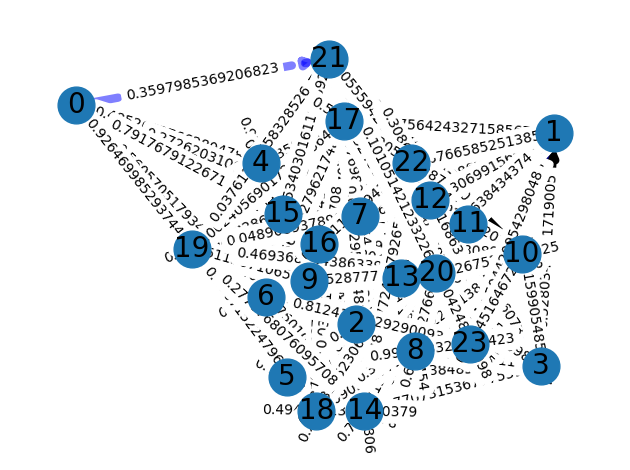

In [56]:
#NOTE: This BOX Code is not for evaluation
# only to visualize the weight attributes on the graph.
#Code taken from here: https://networkx.org/documentation/stable/auto_examples/drawing/plot_weighted_graph.html
elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] > 0.5]
esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] <= 0.5]
pos = nx.spring_layout(G, seed=7)  # positions for all nodes - seed for reproducibility
# nodes
nx.draw_networkx_nodes(G, pos, node_size=700)
# edges
nx.draw_networkx_edges(G, pos, edgelist=elarge, width=6)
nx.draw_networkx_edges(
    G, pos, edgelist=esmall, width=6, alpha=0.5, edge_color="b", style="dashed"
)
# node labels
nx.draw_networkx_labels(G, pos, font_size=20, font_family="sans-serif")
# edge weight labels
edge_labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, edge_labels)
ax = plt.gca()
ax.margins(0.08)
plt.axis("off")
plt.tight_layout()
plt.show()

In [73]:
#4- Let's analyze how to access the weight of a connection
#Ex: We take the connections of the node 1
#it returns a dictionary with the format: 
# { nextNode, {'weight': value} } : 
"""
Ex: 
AtlasView({0: {'weight': 0.8666393340888424}, 
8: {'weight': 0.03878465276536347},   <<<<<<<<<<===== Ex: let's try to access this weight
12: {'weight': 0.8467714748666302}, 
13: {'weight': 0.7405952454392767}, 
14: {'weight': 0.29578665743998944}, 
21: {'weight': 0.8217606232147927}, 
22: {'weight': 0.15359536608669444}})
"""
import random
#let's try to access the weight of the edge (1,8) : 
G[1][8]['weight']


0.03878465276536347

In [118]:
#5- Now let's modify our function to incroporate the weight parameter
#Algorithm:
#5.1- get the a list with next possible vertices.
#5.2- let's also compile the list of the next possible weights into a list
#5.3- Let's pick the next node with random.choice(), which also takes the weight parameters
#5.4- We add the selected node to the list
#5.5- we reset the list of next accessible nodes and the weightlist

def random_walk(G, nodeid, length):
    
    listnextnodes = []
    nextlocalnode = []
    currentNode = nodeid
    weightList = []
    loop = 0

    while loop<length:
        
        #5.1 
        for node in G[currentNode]:
            print('node key', node, '\n')
            nextlocalnode.append(node)

        #5.2
        for n in nextlocalnode:
            weightList.append(G[currentNode][n]['weight'])
        print('weightList', weightList)
        
        #5.3
        nextNode = random.choices(nextlocalnode, weights = weightList , k = 1)
        
        #5.4
        listnextnodes.append(nextNode[0])
        
        #5.5
        nextlocalnode = []
        currentNode = nextNode[0] # random.choice return a list. But we need a digit
        print('currentNode', currentNode)
        weightList = []
        #
        loop+=1

    return listnextnodes

random_walk(G, 5, 5)

currentNode Start:  5
G[currentNode] {2: {'weight': 0.4866699114427797}, 8: {'weight': 0.9889554142552284}, 9: {'weight': 0.14857419746101497}, 10: {'weight': 0.5884337654116305}, 11: {'weight': 0.742380111833336}, 13: {'weight': 0.795824227701023}, 19: {'weight': 0.7863191508249323}, 20: {'weight': 0.18636231609418252}} 

node key 2 

node key 8 

node key 9 

node key 10 

node key 11 

node key 13 

node key 19 

node key 20 

weightList [0.4866699114427797, 0.9889554142552284, 0.14857419746101497, 0.5884337654116305, 0.742380111833336, 0.795824227701023, 0.7863191508249323, 0.18636231609418252]
currentNode 8
currentNode Start:  8
G[currentNode] {0: {'weight': 0.8962357375872663}, 12: {'weight': 0.42325609356679617}, 13: {'weight': 0.539638778838751}, 14: {'weight': 0.3178816384352351}, 15: {'weight': 0.8083681478923046}, 19: {'weight': 0.18476656192159113}} 

node key 0 

node key 12 

node key 13 

node key 14 

node key 15 

node key 19 

weightList [0.8962357375872663, 0.4232560

[8, 12, 20, 22, 2]

### 3.1: computing node degrees of graphs (take 2)

For the graph made by your function in the previous workshop, calculate the **diameter** AND the degrees of each node, and visually confirm those values by inspecting the above graph. Write a function `compute_diameter_and_degrees` which takes a networkx graph object as input, and returns a `dict` with the diameter and the degrees of all the nodes in the graph.

**NOTE:** You cannot use the diameter or degree method from networkx directly to compute the degrees. 

```
compute_diameter_and_degrees(G) -> {
    'diameter': 3,
    'degree_A': 3,
    'degree_B': 1,
    'degree_C': 2,
    'degree_D': 3,
    'degree_E': 3,
}
```

In [ ]:
#DEFINTIONS:
#https://www.youtube.com/watch?v=GLRI7bo8WXo
"""
RADIUS:
   The minimum eccentricitry from all the vertices is considered as the radius of the graph G.
   So the minimum of all the maximum distances between a vertex to all other vertices is considered 
   RADIUS of the graph G.
    
DIAMETER:
   The maximun eccentricity form all the vertices is considered as the diameter of the graph G. 
   So the maximum of all maximum distances between a vertex to all other vertices is considered
   the DIAMETER of the Graph G.
"""

In [120]:
#3.1
#Algorithm:
#1- To evaluated the Diameter, we reuse the Maximun Hops calculation function from workshop_1
#2- To evaluate the degrees, we reuses the function developped in workshop_1
#3- the "compute_diameter_and_degrees()" function is obtain by integrating the 2 previous mentioned functions



def compute_diameter_and_degrees(G):

    finalDic = {}
    tripHops = {} 
    degrees = {}    

    #1: Diameter of the Graph
    
    for start in G.nodes:
        for stop in G.nodes:
            if start == stop:
                continue
            else:
                transits = nx.shortest_path(G, source=start, target=stop, weight=None, method='dijkstra')
                tripHops[(start,stop)] = len(transits)-1
    diameter = max(tripHops.values())
    label = str('diameter')
    finalDic[label] = diameter
    

    
    #2: Node Degrees 

    nodelist = G.nodes
    for n in nodelist:
        atlasdic = (G[n]) #returns an AtlasView dictionary
        for k, v in atlasdic.items():
            #the loops count here, represent the amount of links
            #We don't actually use k or v
            label = str('degree_')+str(n)
            if degrees.get(label,None):
                degrees[label]+=1
            else:
                degrees[label]=1
    
    
    finalDic.update(degrees)         

        
    return finalDic

compute_diameter_and_degrees(G)



{'diameter': 3,
 'degree_0': 12,
 'degree_1': 7,
 'degree_2': 9,
 'degree_3': 8,
 'degree_4': 5,
 'degree_5': 8,
 'degree_6': 8,
 'degree_7': 8,
 'degree_8': 6,
 'degree_9': 9,
 'degree_10': 3,
 'degree_11': 5,
 'degree_12': 8,
 'degree_13': 8,
 'degree_14': 8,
 'degree_15': 6,
 'degree_16': 4,
 'degree_17': 8,
 'degree_18': 7,
 'degree_19': 5,
 'degree_20': 5,
 'degree_21': 5,
 'degree_22': 9,
 'degree_23': 6}

In [ ]:
#It's interesting to notice that unlike Workshop 1, although there are a lot of nodes here,
#the diameter is shorter than the workshop 1 diameter ( which was 5).
#This means that the greater the degrees of the nodes, the shorter the diameter